In [5]:
from helper_functions import *
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

## Analysis

In [6]:
# read csv into dataframe
data = pd.read_csv("data/patterns.csv")

# inspect the shape
print("Data Shape: " + str(data.shape))

# get the average image size
width, height = get_average_image_size('/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos')
print("Width: " + str(width), "Height: " + str(height))


Data Shape: (56, 1)
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/7d86be723b.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/c634a6c02d.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/8b4d52e611.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/abe84bcfdf.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/b9ec0c9878.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/fe0272322f.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/8dedf76d2d.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/fdfe5de21a.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/7ce54e685d/20bdf7691a.png
/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowsk

###  Step 1: Isolate the primary object in the image and fill in the backdrop

This uses an image segmentation technique called thresholding

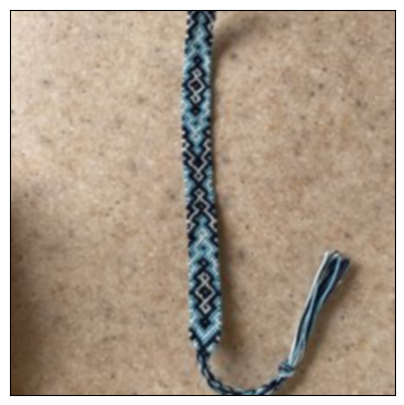

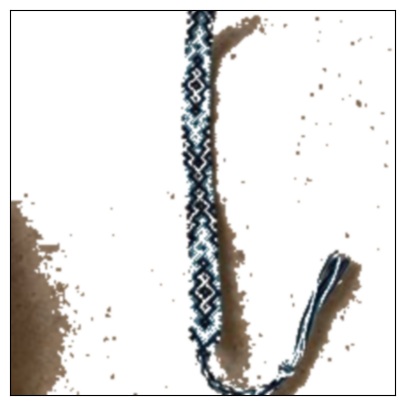

In [7]:
#  Thresholding from open cv 

#The line below is necessary to show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline
from matplotlib import pyplot as plt

def showimage(myimage):
    if (myimage.ndim>2):  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
        myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order
         
    fig, ax = plt.subplots(figsize=[5,5])
    ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

# Read image
img = cv2.imread('/home/cassidy/DSC412/project/DSC412-project-cassidy-petrykowski/data/photos/b7ac41ca29/7d75fc8726.png')

#Use this helper function if you are working in Jupyter Lab
#If not, then directly use cv2.imshow(<window name>, <image>)
 
showimage(img)
showimage(bgremove2(img))

# will update so that images are adjusted when they are imported

### Split the data between training and testing

Because the csv contains the names for both the photos and grid, it can be split into one training set and one testing set.

When the data is actually accessed, the distinction between inputs and outputs or photos and grids will be made.

In [4]:
train_set, test_set = train_test_split(             data,
                                                    test_size=0.7, 
                                                    random_state=42
                                                   )
print(train_set)

    7092f1985d
43  edba2a6bbe
39  09dbfb528d
35  51684b0d4c
23  c3cbf850c5
45  b1b55738b1
10  2666e3c94b
22  ef642b8b75
18  c3af8775ca
55  f9232fe1b3
20  95fa1a221a
7   113fbb67d4
42  2e024bf09e
14  1e1bdfb2e7
28  df03231a62
51  337c0070cc
38  7ce54e685d


### 
